# Table of Contents
* [Supervised Classification](#Supervised-Classification)
* [Classification for Dectection](#Classification-for-Dectection)
* [Classification for Dectection](#Classification-for-Dectection)
* [Training Your Logistic Classifier](#Training-Your-Logistic-Classifier)
* [Softmax Q](#Softmax-Q)


# Supervised Classification

- Classification is the task that taking an input and give it a label
- Classification or marginally prediction is the central building block of machine learning.

<img src="images/pic01.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811818)*

<!--TEASER_END-->

# Classification for Dectection

Let's take an example the task of detection: Imagine you have a camera looking at the street ahead, and you want to detect where the pedestrians are in front of you so that you don't hit them. How would you use a classifier to do that?
- A typical method is to run a binary classifier over different areas of an image, so a classifier that classifies small patches of the image into 2 classes: pedestrians or no pedestrians, and mark the areas with a positive label as detected instances.

<img src="images/pic02.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6406301860/m-6400212309)*

<!--TEASER_END-->

# Classification for Ranking

Here's another example of web search ranking: Imagine you have a search query and you want to find all the web pages on the web that are relevant for that query. How would you use a classifier to do that?
- There are several ways of doing this - one is to classify pairs of (<query>, <web page>) and output one of two classes: relevant/not relevant.

<img src="images/pic03.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6375271973/m-6382633324)*

<!--TEASER_END-->

# Training Your Logistic Classifier

Let's get started training a logistic classifier 
- A logistic classifier is what's called a linear classifier that takes the input for example the pixels in the image and applies a linear fashion to them to generate its predictions 
- A linear function is just adjacent matrix multiply, it takes all the inputs as a big vector that will denote X and multiplies them with a matrix to generate its predictions 1 per output class 
- We will denote the inputs by X, the weights by W and the bias term by b. The weight of the matrix and the bias is where the machine learning comes in. We're going to train that model that means we're going to try to find the values for the weights and biases which are good at performing those predictions 

<img src="images/pic04.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811820)*

<!--TEASER_END-->

How are we going to use the scores to perform the classification? Each image that we have as an input can have one and only one possible label so we're going to turn the scores into probabilities. We're going to launch the probability of the correct class to be very close to one and a property for every other class to be close to zero 

<img src="images/pic05.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811820)*

<!--TEASER_END-->

The way to turn scores into probabilities is to use the softmax function:
$$S(y_i) = \frac{e^{y_i}}{\sum_j e^{y_i}}$$

What's important to know is that it it can take any kind of scores and turn them into proper probabilities. Probabilities sum to one and there will be large when the scores are large and small when the scores are comparatively smaller. Scores in the context of logistic regression are often also called "logits"

<img src="images/pic06.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811820)*

<!--TEASER_END-->

# Softmax Q

Here's an example solution we take the exponential of the scores and we divide by the sum of the exponential of the scores across the other categories.

Here is the result, notice that the probabilities do sum to 1. Let's add some legends to make this a bit more clear, as you can see the probability of the class 1 increases with the score X it starts near zero and close to one at the same time the probabilities of the other classes start pretty high but then go down to 0.

[ 0.8360188   0.11314284  0.05083836]


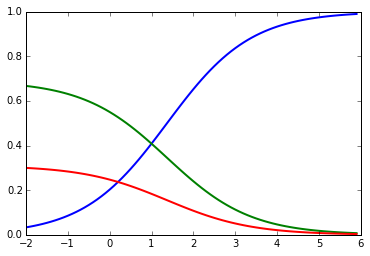

In [3]:
# %load softmax.py
"""Softmax."""
# https://en.wikipedia.org/wiki/Softmax_function
%matplotlib inline

scores = [3.0, 1.0, 0.2]

import numpy as np

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)

print(softmax(scores))

# Plot softmax curves
import matplotlib.pyplot as plt
x = np.arange(-2.0, 6.0, 0.1)
scores = np.vstack([x, np.ones_like(x), 0.2 * np.ones_like(x)])

plt.plot(x, softmax(scores).T, linewidth=2)
plt.show()


** If you multiple the score by 10, what happens?**

In [13]:
scores = [3.0, 1.0, 0.2]
print(softmax(scores * 10))

[ 0.08360188  0.01131428  0.00508384  0.08360188  0.01131428  0.00508384
  0.08360188  0.01131428  0.00508384  0.08360188  0.01131428  0.00508384
  0.08360188  0.01131428  0.00508384  0.08360188  0.01131428  0.00508384
  0.08360188  0.01131428  0.00508384  0.08360188  0.01131428  0.00508384
  0.08360188  0.01131428  0.00508384  0.08360188  0.01131428  0.00508384]


**If you mulitply the scores by 10, the scores get either very close to 1.0 or very small.**

<img src="images/pic07.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6374172139/m-6473358789)*

<!--TEASER_END-->

**If you devide the score by 10, what happens?**

<img src="images/pic08.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6397571319/m-6377162118)*

<!--TEASER_END-->

# One-Hot Encoding

If you increase the size of your outputs, your classifier becomes very confident about its predictions but if you reduce the size of your outputs, classifier becomes very ensure. Keep this in mind for later we want a classifier to not be too sure itself in the beginning and then over time it will gain confidence as it learns

<img src="images/pic09.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811824)*

<!--TEASER_END-->

Next we need a way to represent our labels mathematically. We just said let's have the probabilities for the correct class be close to one and the probability for all the others be close to zero we can write down exactly that:
- Each label will be represented by a vector that is as long as their classes and it has the value 1.0 for the correct class and 0 everywhere else. This is often called **one-hot encoding**

<img src="images/pic10.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6371351051/m-6373302055)*

<!--TEASER_END-->

For a consistent one hot including we need to pick ones such that each class gets a unique position on the vector. Here's what I picked given this including the most likely classes is C.

<img src="images/pic11.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/e-6371351051/m-6378892059)*

<!--TEASER_END-->

# Cross Entropy

One-hot encoding works very well for most problems until you get into situations where you have tens of thousands or even millions of classes. In that case your vector becomes really really large and as mostly zero everywhere and that becomes very inefficient.

You'll see later how we can deal with this problems by using embeddings. 

<img src="images/pic12.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811826)*

<!--TEASER_END-->

What's nice about this approach is that we can now measure how well we're doing by simply comparing two vectors: one that comes out of your classifiers and contains the probabilities of your classes and the one-hot enconding vector that corresponds to your labels.

<img src="images/pic13.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811826)*

<!--TEASER_END-->

**Let's see how we can do this in practice.**

The natural way to measure the distance between those two probability vectors is called the **cross entropy** denoted by D here for distance:

$$D(S,L) = - \sum_i L_i log(S_i)$$

Be careful! The cross entropy is not symmetric and you have a nasty log in there so you have to make sure that your labels and your distributions are in the right place 
- Your labels because they are one hot encoded will have a lot of zeros in them and you don't want that to take the log of zero - For your distribution the softmax will always guarantee that you have a little bit of probability going everywhere so you never really take a log of zero.

<img src="images/pic14.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811826)*

<!--TEASER_END-->

**Let's recap because we have a lot of pieces**

- So we have inputs, which are going to be turned into "Logit", using a linear model which is basically a matrix multiply and a bias 
- We are then going to feed the logit which are scores into a soft max to turn them into probabilities 
- Then we're going to compare those probabilities to the one hot encoding labels using the cross entropy function 

<img src="images/pic15.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811826)*

<!--TEASER_END-->

**This entire setting is often called multinomial logistic classification**

<img src="images/pic16.png">

*Screenshot taken from [Udacity](https://www.udacity.com/course/viewer#!/c-ud730/l-6370362152/m-6379811826)*

<!--TEASER_END-->

# Minimizing Cross Entropy